In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Job_Placement_Data.csv')
df.shape

(215, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       161 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    202 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  186 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          167 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


<Axes: >

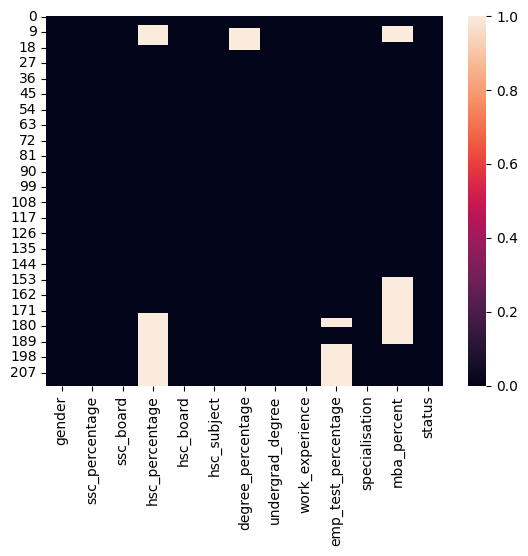

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.isnull().sum()

gender                  0
ssc_percentage          0
ssc_board               0
hsc_percentage         54
hsc_board               0
hsc_subject             0
degree_percentage      13
undergrad_degree        0
work_experience         0
emp_test_percentage    29
specialisation          0
mba_percent            48
status                  0
dtype: int64

In [ ]:
df.shape[0]

215

In [ ]:
null_var=df.isnull().sum()/df.shape[0]*100
null_var

gender                  0.000000
ssc_percentage          0.000000
ssc_board               0.000000
hsc_percentage         25.116279
hsc_board               0.000000
hsc_subject             0.000000
degree_percentage       6.046512
undergrad_degree        0.000000
work_experience         0.000000
emp_test_percentage    13.488372
specialisation          0.000000
mba_percent            22.325581
status                  0.000000
dtype: float64

In [ ]:
df.isnull().sum()/df.shape[0]*100>20

gender                 False
ssc_percentage         False
ssc_board              False
hsc_percentage          True
hsc_board              False
hsc_subject            False
degree_percentage      False
undergrad_degree       False
work_experience        False
emp_test_percentage    False
specialisation         False
mba_percent             True
status                 False
dtype: bool

In [ ]:
drop_column=null_var[null_var>20].keys()
drop_column

Index(['hsc_percentage', 'mba_percent'], dtype='object')

In [ ]:
df_drop=df.drop(columns=drop_column)
df_drop.shape

(215, 11)

In [ ]:
df_drop.isnull().sum()

gender                  0
ssc_percentage          0
ssc_board               0
hsc_board               0
hsc_subject             0
degree_percentage      13
undergrad_degree        0
work_experience         0
emp_test_percentage    29
specialisation          0
status                  0
dtype: int64

<Axes: >

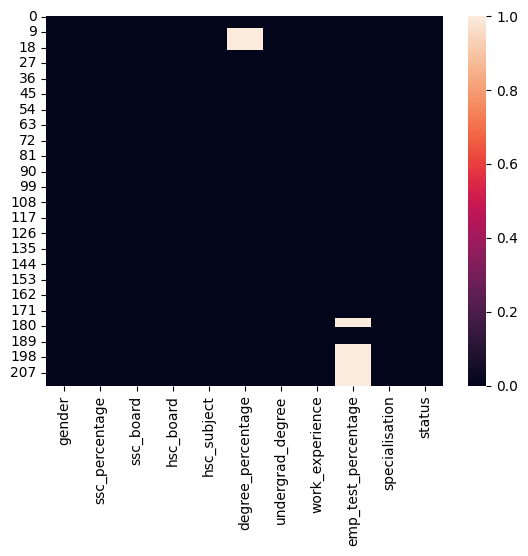

In [ ]:
sns.heatmap(df_drop.isnull())

In [ ]:
df_clean=df_drop.dropna()

<Axes: >

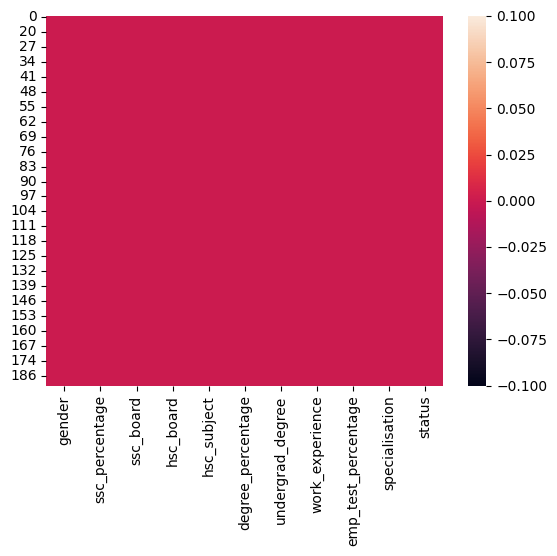

In [ ]:
sns.heatmap(df_clean.isnull())

In [ ]:
num_var=df_clean.select_dtypes(include=['int64','float64'])
num_var.columns

Index(['ssc_percentage', 'degree_percentage', 'emp_test_percentage'], dtype='object')

In [ ]:
list(enumerate(num_var))

[(0, 'ssc_percentage'), (1, 'degree_percentage'), (2, 'emp_test_percentage')]

<ipython-input-21-722e615001ac>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[item],bins=20,label='df')
<ipython-input-21-722e615001ac>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean[item],bins=20,label='df_cleaned')
<ipython-input-21-722e615001ac>:3: UserWarning: 

`distplot` i

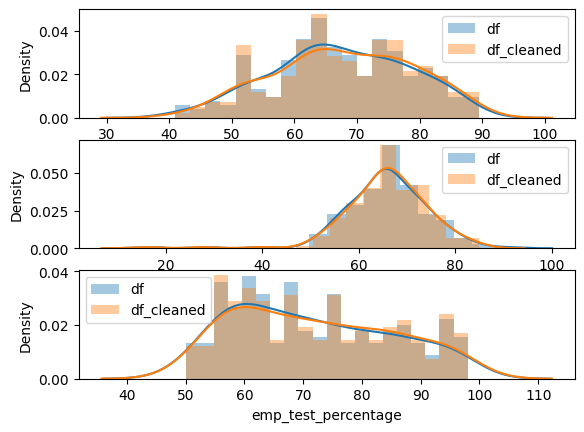

In [ ]:
for index,item in enumerate(num_var):
  plt.subplot(3,1,index+1)
  sns.distplot(df[item],bins=20,label='df')
  sns.distplot(df_clean[item],bins=20,label='df_cleaned')
  plt.legend()

In [ ]:
cat_var=df_clean.select_dtypes(include='object')
cat_var.columns

Index(['gender', 'ssc_board', 'hsc_board', 'hsc_subject', 'undergrad_degree',
       'work_experience', 'specialisation', 'status'],
      dtype='object')

In [ ]:
list(enumerate(cat_var))

[(0, 'gender'),
 (1, 'ssc_board'),
 (2, 'hsc_board'),
 (3, 'hsc_subject'),
 (4, 'undergrad_degree'),
 (5, 'work_experience'),
 (6, 'specialisation'),
 (7, 'status')]

<ipython-input-38-157427418ad2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[item].value_counts(),bins=20,label='df')
<ipython-input-38-157427418ad2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean[item].value_counts(),bins=20,label='df_clean')
<ipython-input-38-157427418ad2>:4:

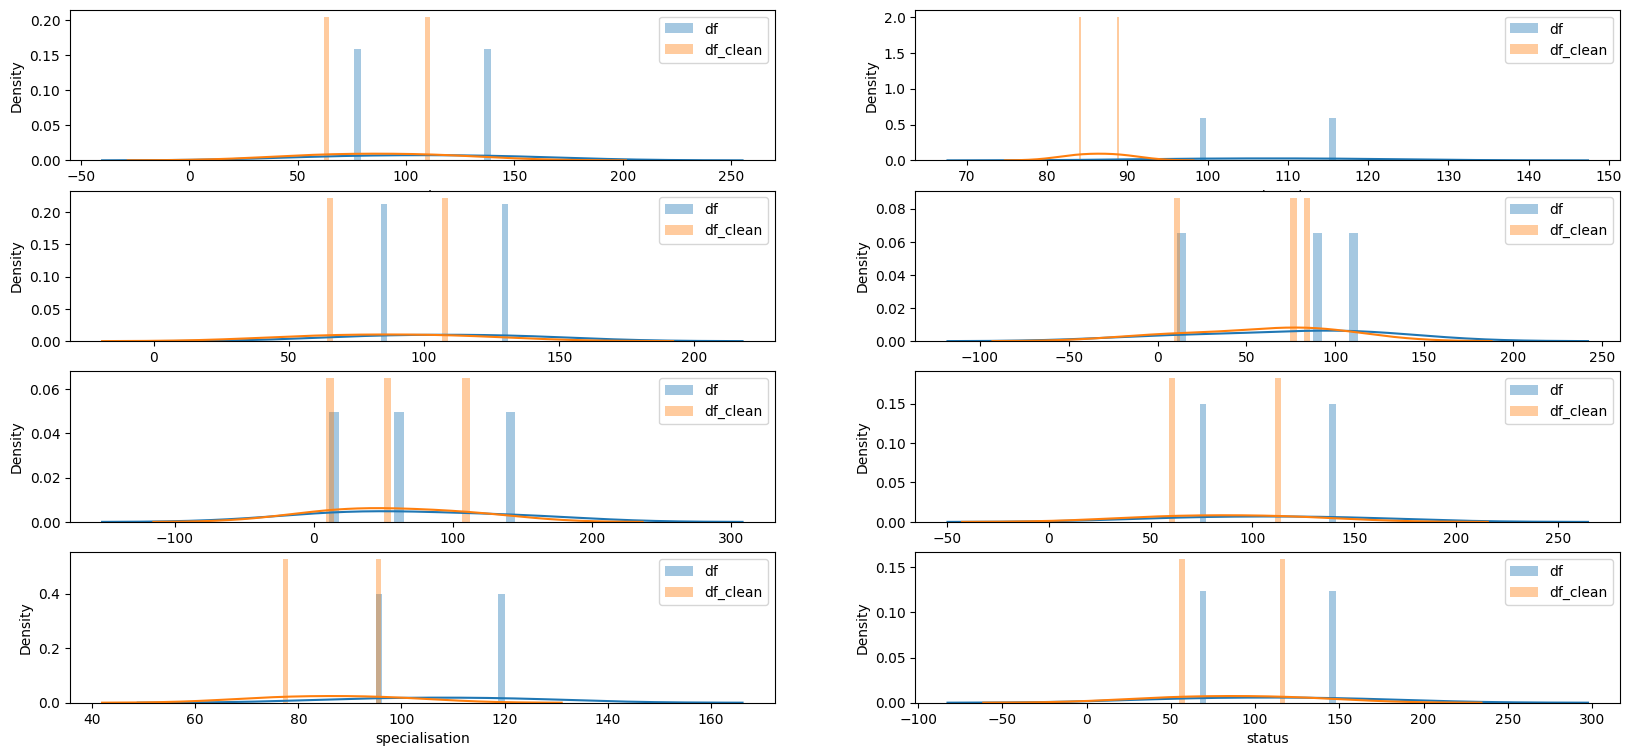

In [ ]:
plt.figure(figsize=(20,9))
for index,item in enumerate(cat_var):
  plt.subplot(4,2,index+1)
  sns.distplot(df[item].value_counts(),bins=20,label='df')
  sns.distplot(df_clean[item].value_counts(),bins=20,label='df_clean')
  plt.legend()